# 1- Import Libraries & Explore Data

In [1]:
# Import Libraries for Data Analysis 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import copy
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
        
# Machine Learning Libraries for training and testing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
# read data
data = pd.read_csv('Predict Price of Airline Tickets.csv')

In [3]:
# display data
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
# display basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# display description of (numerical) data
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# 2-  Data Preprocessing I

In [6]:
# a function that returns the season of a given data

def season(travelDate):
    
    # extract the date
    tDate = dt.datetime.strptime(travelDate, '%d/%m/%Y').date()
    
    # extract the year of the date
    year = tDate.year
    
    # return the appropriate season depending on the date
    if tDate >= dt.date(year, 3, 21) and tDate < dt.date(year, 6, 21):
        return 'Spring'
    elif tDate >= dt.date(year, 6, 21) and tDate < dt.date(year, 9, 23):
        return 'Summer'
    elif tDate >= dt.date(year, 9, 23) and tDate < dt.date(year, 12, 21):
        return 'Fall'
    else:
        return 'Winter'


In [7]:
# create a new column 'Season' where the function 'season' is applied to the date of journey
data['Season'] = data['Date_of_Journey'].apply(season)

In [8]:
# a function that returns the length of the flight depending on its duration

def flightLength(duration):
    
    # initalize hour variable
    hour = 0
    
    # if there is an 'h' in the duration (meaning it's at least an hour long)
    if 'h' in duration:
        
        # get the number of hours
        hour = int(duration.partition('h')[0])
    
    # return appropriate length depending on duration
    if hour < 3:
        return 'Short'
    elif hour >= 3 and hour < 6:
        return 'Mid'
    else:
        return 'Long'

In [9]:
# create a new column 'Flight_Length' where the function 'flightlength' is applied to the duration
data['Flight_Length'] = data['Duration'].apply(flightLength)

In [10]:
# a function that returns a bool on whether the flight departed at peak hours
def peakHrs(depTime):
    
    # get hour of departure
    hour = depTime.partition(':')[0]
    
    # if it's before 9 AM or after 8 PM return False
    if int(hour) < 9 or int(hour) >= 20:
        return False
    else:
        return True

In [11]:
# create a new column 'Peak_Hours' where the function 'peakHrs' is applied to the departure time
data['Peak_Hours'] = data['Dep_Time'].apply(peakHrs)

In [12]:

# rearange column order
data = data[['Airline', 'Date_of_Journey', 'Season', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Flight_Length', 'Peak_Hours', 'Total_Stops', 'Price', 'Additional_Info']]



In [13]:
# display data
data

,Airline,Date_of_Journey,Season,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Flight_Length,Peak_Hours,Total_Stops,Price,Additional_Info
0,IndiGo,24/03/2019,Spring,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,Short,False,non-stop,3897,No info
1,Air India,1/05/2019,Spring,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,Long,False,2 stops,7662,No info
2,Jet Airways,9/06/2019,Spring,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,Long,True,2 stops,13882,No info
3,IndiGo,12/05/2019,Spring,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,Mid,True,1 stop,6218,No info
4,IndiGo,01/03/2019,Winter,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,Mid,True,1 stop,13302,No info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Spring,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,Short,True,non-stop,4107,No info
10679,Air India,27/04/2019,Spring,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,Short,False,non-stop,4145,No info
10680,Jet Airways,27/04/2019,Spring,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,Mid,False,non-stop,7229,No info
10681,Vistara,01/03/2019,Winter,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,Short,True,non-stop,12648,No info


# 3- Checking Outliers & Missing Values

## Price

C:\Users\Ash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

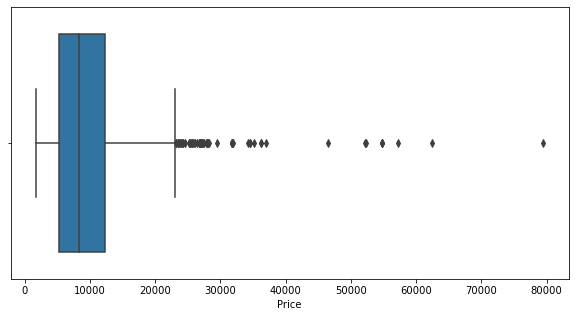

In [14]:
plt.figure(figsize= (10,5))
sns.boxplot(data['Price'])

<Figure size 1800x360 with 0 Axes>

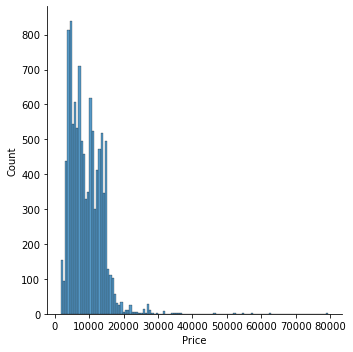

In [15]:
plt.figure(figsize= (25,5))
sns.displot(data['Price'])

In [16]:
# drop any row with a price equal to or more than 22000
data.drop(data[data['Price'] >= 22000].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\3135483442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['Price'] >= 22000].index, inplace=True)


C:\Users\Ash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

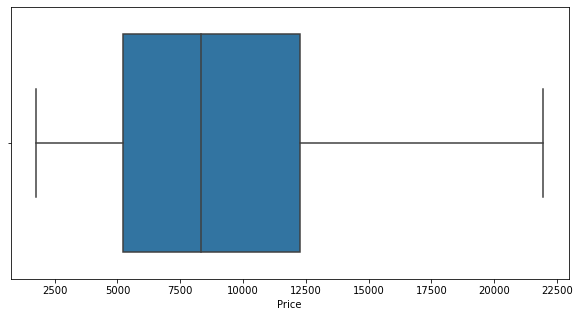

In [17]:
plt.figure(figsize= (10,5))
sns.boxplot(data['Price'])

## Price relative to Flight Length and Number of Stops

<AxesSubplot:xlabel='Price', ylabel='Flight_Length'>

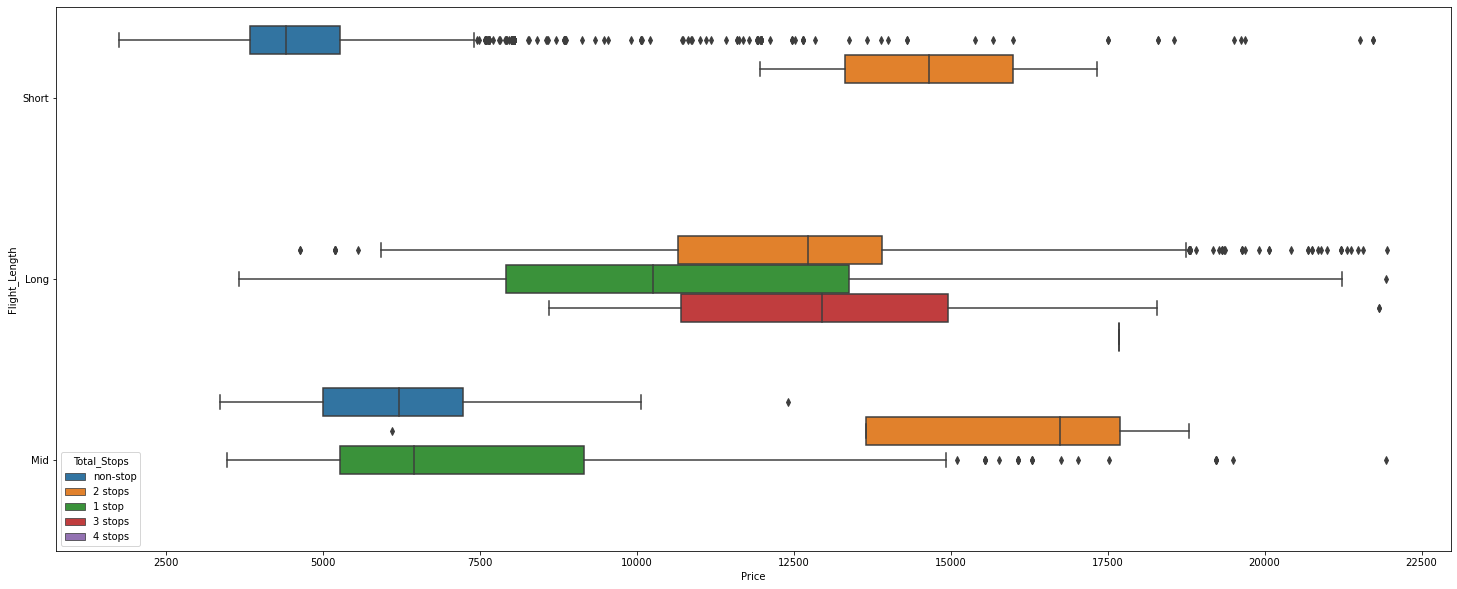

In [18]:
plt.figure(figsize= (25,10))
sns.boxplot(x='Price', y='Flight_Length', hue='Total_Stops', data=data)

### Short Flights

<AxesSubplot:xlabel='Price', ylabel='Flight_Length'>

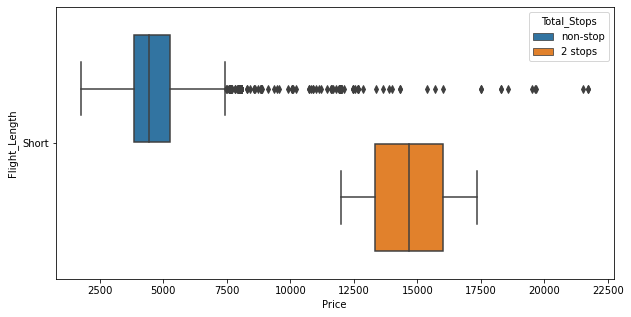

In [19]:
plt.figure(figsize= (10,5))
sns.boxplot(x='Price', y='Flight_Length', hue='Total_Stops', data=data[data['Flight_Length'] == 'Short'])

In [20]:
# drop any row with a short flight and 2 stops
data.drop(data[(data['Flight_Length'] == 'Short') & (data['Total_Stops'] == '2 stops')].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\2183174133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Flight_Length'] == 'Short') & (data['Total_Stops'] == '2 stops')].index, inplace=True)


In [21]:
# drop any row with a short flight and a price exceeding 6500
data.drop(data[(data['Price'] > 6500) & (data['Flight_Length'] == 'Short')].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\2725843893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Price'] > 6500) & (data['Flight_Length'] == 'Short')].index, inplace=True)


In [22]:
# drop any row with a short flight and a price below 1800
data.drop(data[(data['Price'] < 1800) & (data['Flight_Length'] == 'Short')].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\806355120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Price'] < 1800) & (data['Flight_Length'] == 'Short')].index, inplace=True)


<AxesSubplot:xlabel='Price', ylabel='Flight_Length'>

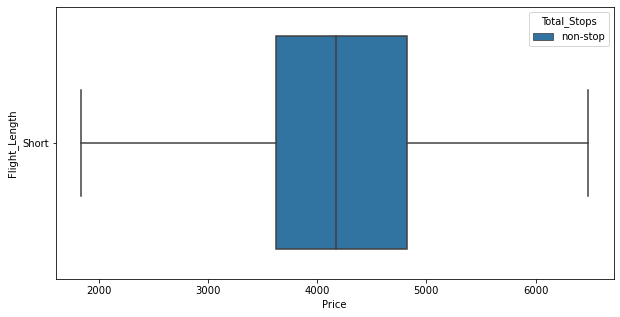

In [23]:
plt.figure(figsize= (10,5))
sns.boxplot(x='Price', y='Flight_Length', hue='Total_Stops', data=data[data['Flight_Length'] == 'Short'])

### Long Flights

<AxesSubplot:xlabel='Price', ylabel='Flight_Length'>

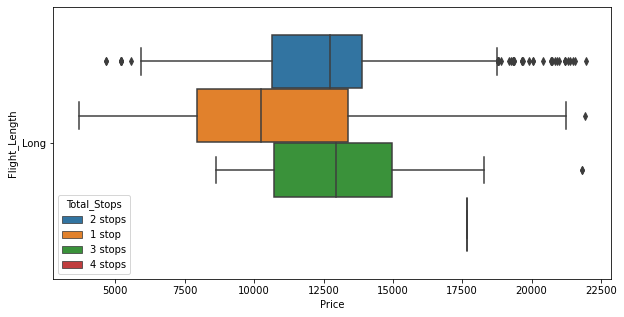

In [24]:
plt.figure(figsize= (10,5))
sns.boxplot(x='Price', y='Flight_Length', hue='Total_Stops', data=data[data['Flight_Length'] == 'Long'])

In [25]:
# drop any row with a long flight and 2 stops and a price exceeding 18500
data.drop(data[(data['Price'] > 18500) & (data['Flight_Length'] == 'Long') & (data['Total_Stops'] == '2 stops')].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\1088580901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Price'] > 18500) & (data['Flight_Length'] == 'Long') & (data['Total_Stops'] == '2 stops')].index, inplace=True)


In [26]:
# drop any row with a long flight and 2 stops and a price below 6000
data.drop(data[(data['Price'] < 6000) & (data['Flight_Length'] == 'Long') & (data['Total_Stops'] == '2 stops')].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\1201494064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Price'] < 6000) & (data['Flight_Length'] == 'Long') & (data['Total_Stops'] == '2 stops')].index, inplace=True)


In [27]:
# drop any row with a long flight and a price exceeding 21000
data.drop(data[(data['Price'] > 21000) & (data['Flight_Length'] == 'Long')].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\2946314586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Price'] > 21000) & (data['Flight_Length'] == 'Long')].index, inplace=True)


In [28]:
# drop any row with 4 stops
data.drop(data[data['Total_Stops'] == '4 stops'].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\2860368342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['Total_Stops'] == '4 stops'].index, inplace=True)


<AxesSubplot:xlabel='Price', ylabel='Flight_Length'>

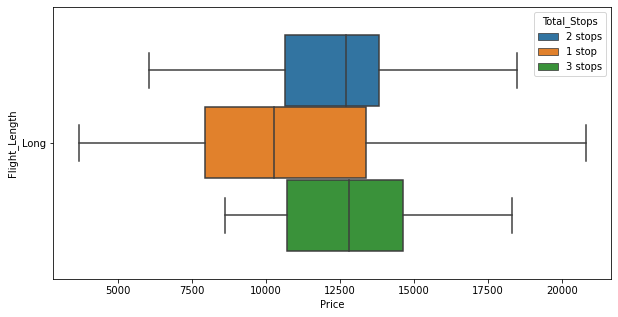

In [29]:
plt.figure(figsize= (10,5))
sns.boxplot(x='Price', y='Flight_Length', hue='Total_Stops', data=data[data['Flight_Length'] == 'Long'])

### Medium Flights

<AxesSubplot:xlabel='Price', ylabel='Flight_Length'>

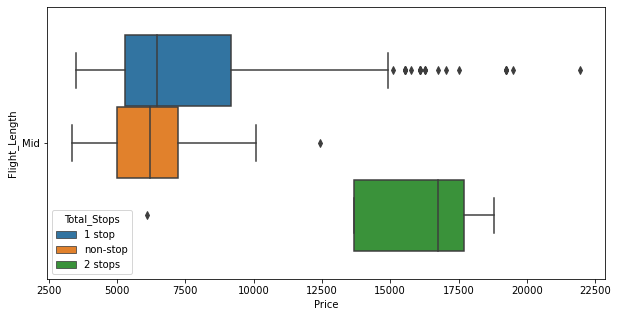

In [30]:
plt.figure(figsize= (10,5))
sns.boxplot(x='Price', y='Flight_Length', hue='Total_Stops', data=data[data['Flight_Length'] == 'Mid'])

In [31]:
# drop any row with a medium flight and 1 stop and a price exceeding 12000
data.drop(data[(data['Price'] > 12000) & (data['Flight_Length'] == 'Mid') & (data['Total_Stops'] == '1 stop')].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\2383403868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Price'] > 12000) & (data['Flight_Length'] == 'Mid') & (data['Total_Stops'] == '1 stop')].index, inplace=True)


In [32]:
# drop any row with a medium flight and 2 stops
data.drop(data[(data['Flight_Length'] == 'Mid') & (data['Total_Stops'] == '2 stops')].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\1846683344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Flight_Length'] == 'Mid') & (data['Total_Stops'] == '2 stops')].index, inplace=True)


<AxesSubplot:xlabel='Price', ylabel='Flight_Length'>

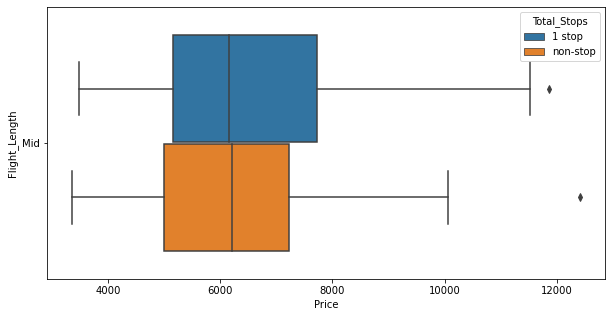

In [33]:
plt.figure(figsize= (10,5))
sns.boxplot(x='Price', y='Flight_Length', hue='Total_Stops', data=data[data['Flight_Length'] == 'Mid'])

In [34]:
# drop any row with a medium flight and a price exceeding 11000
data.drop(data[(data['Flight_Length'] == 'Mid') & (data['Price'] > 11000)].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\1094349487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Flight_Length'] == 'Mid') & (data['Price'] > 11000)].index, inplace=True)


In [35]:
# drop any row with a medium flight and a price exceeding 9500 and 1 stop
data.drop(data[(data['Flight_Length'] == 'Mid') & (data['Price'] > 9500) & (data['Total_Stops'] == '1 stop')].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\2219873674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Flight_Length'] == 'Mid') & (data['Price'] > 9500) & (data['Total_Stops'] == '1 stop')].index, inplace=True)


<AxesSubplot:xlabel='Price', ylabel='Flight_Length'>

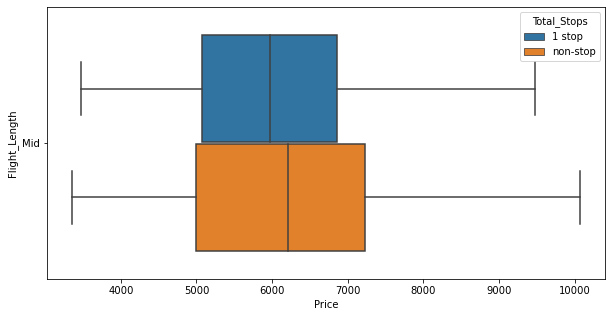

In [36]:
plt.figure(figsize= (10,5))
sns.boxplot(x='Price', y='Flight_Length', hue='Total_Stops', data=data[data['Flight_Length'] == 'Mid'])

### Review

<AxesSubplot:xlabel='Price', ylabel='Flight_Length'>

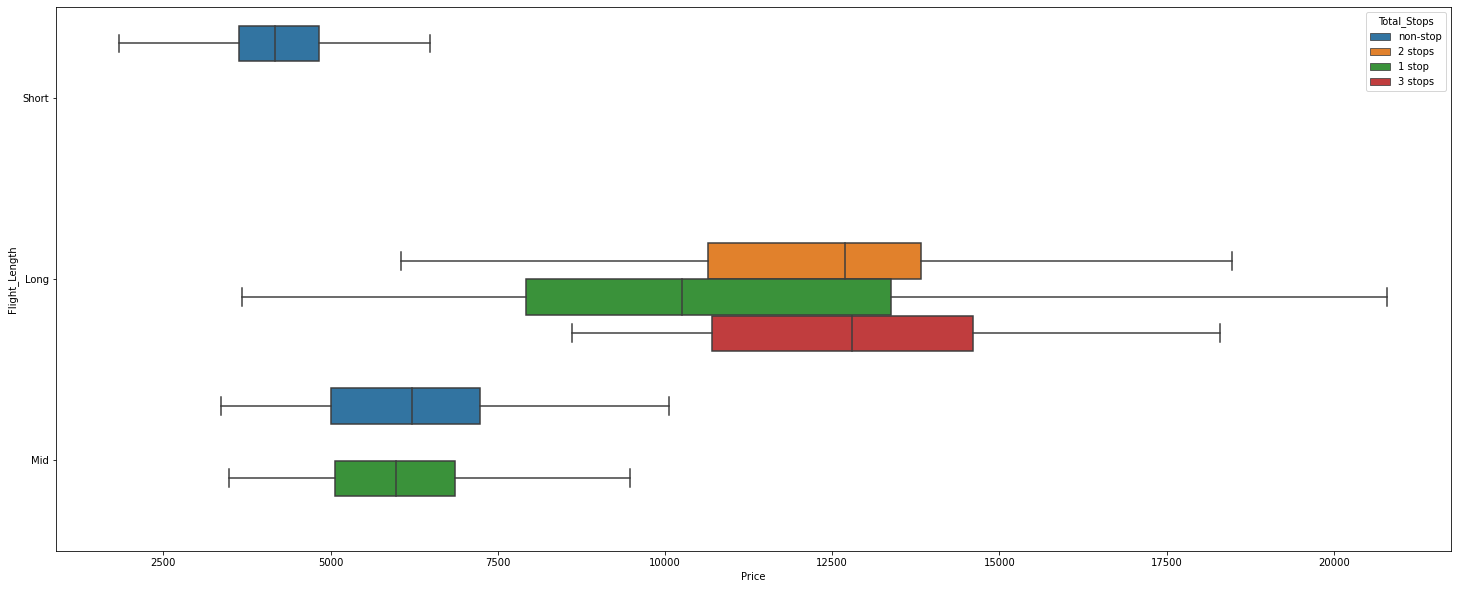

In [37]:
plt.figure(figsize= (25,10))
sns.boxplot(x='Price', y='Flight_Length', hue='Total_Stops', data=data)

## Price relative to Airlines

In [38]:
# group data by airline
byAirline = data.groupby('Airline')

In [39]:
# display description of (numerical) data grouped by airline
byAirline.describe()

Price                                     \
                                    count          mean          std     min   
Airline                                                                        
Air Asia                            297.0   5396.367003  1819.371328  3383.0   
Air India                          1636.0   9420.025672  3456.740271  2050.0   
GoAir                               175.0   5325.605714  1686.685684  3398.0   
IndiGo                             1917.0   5417.243088  1982.148989  2227.0   
Jet Airways                        3486.0  11281.890132  3410.981555  1840.0   
Multiple carriers                  1180.0  10710.944068  3245.980779  5797.0   
Multiple carriers Premium economy    13.0  11418.846154  1717.153936  9845.0   
SpiceJet                            793.0   4227.813367  1598.850885  1965.0   
Trujet                                1.0   4140.000000          NaN  4140.0   
Vistara                             423.0   7410.744681  2599.531439  3687.0   
Vistara Premium economy               1.0   5969.000000          NaN  5969.0   

                                                                         
                                        25%      50%       75%      max  
Airline                                                                  
Air Asia                            4282.00   4483.0   6181.00  13474.0  
Air India                           6533.25   9639.5  12173.00  18959.0  
GoAir                               3898.00   4959.0   6286.00  10586.0  
IndiGo                              4174.00   4823.0   6316.00  16162.0  
Jet Airways                         9314.00  11257.5  13941.00  20800.0  
Multiple carriers                   7695.00  10197.0  13572.75  19332.0  
Multiple carriers Premium economy  10161.00  11269.0  11269.00  14629.0  
SpiceJet                            3573.00   3873.0   4622.00  13552.0  
Trujet                              4140.00   4140.0   4140.00   4140.0  
Vistara                             4878.00   7266.0   9187.00  18387.0  
Vistara Premium economy             5969.00   5969.0   5969.00   5969.0

In [40]:
# drop Trujet, Vistara Premium economy and Multiple carriers Premium economy airlines from data (due to their very low numbers)
data.drop(data[(data['Airline'] == 'Trujet') | (data['Airline'] == 'Vistara Premium economy') | (data['Airline'] == 'Multiple carriers Premium economy')].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\2990022425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Airline'] == 'Trujet') | (data['Airline'] == 'Vistara Premium economy') | (data['Airline'] == 'Multiple carriers Premium economy')].index, inplace=True)


### Air Asia

<AxesSubplot:xlabel='Price', ylabel='Airline'>

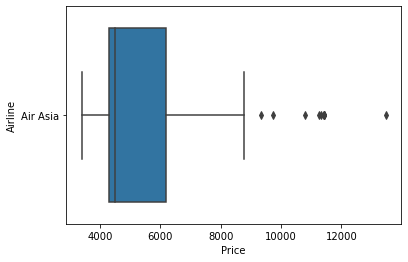

In [41]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'Air Asia'])

In [42]:
# drop any row from Air Asia with a price exceeding 9000
data.drop(data[(data['Airline'] == 'Air Asia') & (data['Price'] > 9000)].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\2389316039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Airline'] == 'Air Asia') & (data['Price'] > 9000)].index, inplace=True)


<AxesSubplot:xlabel='Price', ylabel='Airline'>

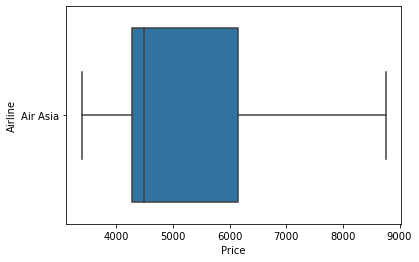

In [43]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'Air Asia'])

### Air India

<AxesSubplot:xlabel='Price', ylabel='Airline'>

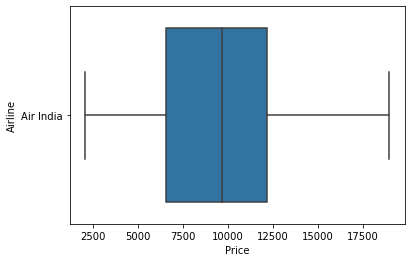

In [44]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'Air India'])

### GoAir

<AxesSubplot:xlabel='Price', ylabel='Airline'>

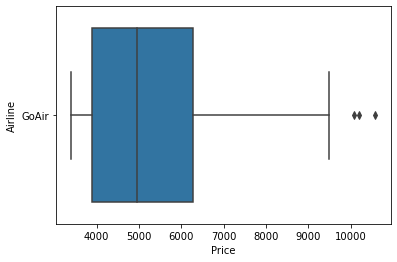

In [45]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'GoAir'])

In [46]:
# drop any row from GoAir with a price exceeding 9500
data.drop(data[(data['Airline'] == 'GoAir') & (data['Price'] > 9500)].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\273382969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Airline'] == 'GoAir') & (data['Price'] > 9500)].index, inplace=True)


<AxesSubplot:xlabel='Price', ylabel='Airline'>

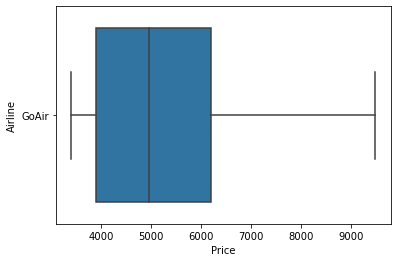

In [47]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'GoAir'])

### IndieGo

<AxesSubplot:xlabel='Price', ylabel='Airline'>

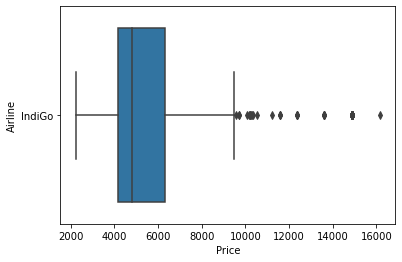

In [48]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'IndiGo'])

In [49]:
# drop any row from IndiGo with a price exceeding 9000
data.drop(data[(data['Airline'] == 'IndiGo') & (data['Price'] > 9000)].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\3433727215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Airline'] == 'IndiGo') & (data['Price'] > 9000)].index, inplace=True)


<AxesSubplot:xlabel='Price', ylabel='Airline'>

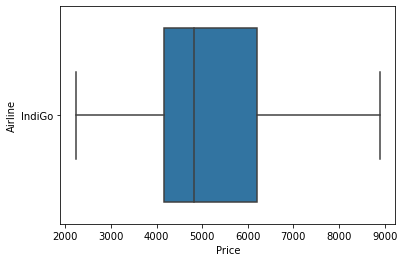

In [50]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'IndiGo'])

### Jet Airways

<AxesSubplot:xlabel='Price', ylabel='Airline'>

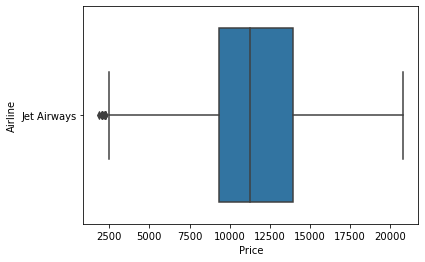

In [51]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'Jet Airways'])

In [52]:
# drop any row from Jet Airways with a price below 2500
data.drop(data[(data['Airline'] == 'Jet Airways') & (data['Price'] < 2500)].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\1853980827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Airline'] == 'Jet Airways') & (data['Price'] < 2500)].index, inplace=True)


<AxesSubplot:xlabel='Price', ylabel='Airline'>

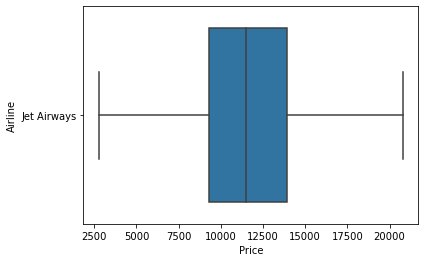

In [53]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'Jet Airways'])

### Multiple carriers

<AxesSubplot:xlabel='Price', ylabel='Airline'>

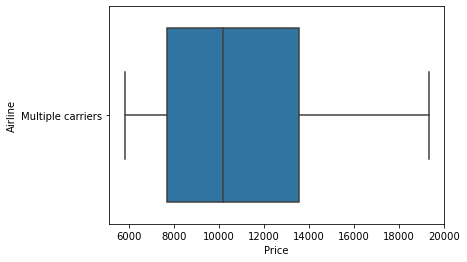

In [54]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'Multiple carriers'])

### SpiceJet

<AxesSubplot:xlabel='Price', ylabel='Airline'>

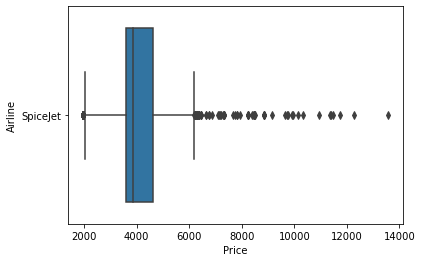

In [55]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'SpiceJet'])

In [56]:
# drop any row from SpiceJet with a price above 4300 or a price below 3200
data.drop(data[(data['Airline'] == 'SpiceJet') & ((data['Price'] > 4300) | (data['Price'] < 3200))].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\2502581758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Airline'] == 'SpiceJet') & ((data['Price'] > 4300) | (data['Price'] < 3200))].index, inplace=True)


<AxesSubplot:xlabel='Price', ylabel='Airline'>

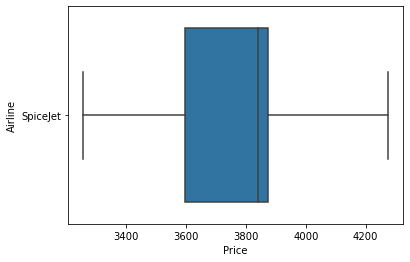

In [57]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'SpiceJet'])

### Vistara

<AxesSubplot:xlabel='Price', ylabel='Airline'>

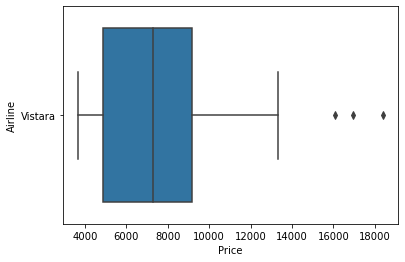

In [58]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'Vistara'])

In [59]:
# drop any row from Vistara with a price exceeding 15000
data.drop(data[(data['Airline'] == 'Vistara') & (data['Price'] > 15000)].index, inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\841444483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[(data['Airline'] == 'Vistara') & (data['Price'] > 15000)].index, inplace=True)


<AxesSubplot:xlabel='Price', ylabel='Airline'>

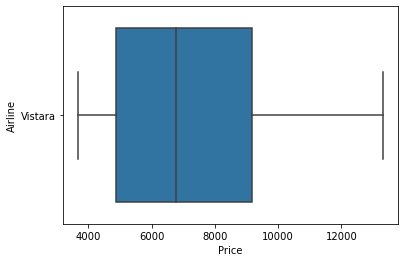

In [60]:
sns.boxplot(x='Price', y='Airline', data=data[data['Airline'] == 'Vistara'])

### Missing Values & Duplicates

In [61]:
# drop null values in data
data.dropna(inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\658830855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [62]:
# Check for null values in data
data.isna().apply(pd.value_counts)

,Airline,Date_of_Journey,Season,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Flight_Length,Peak_Hours,Total_Stops,Price,Additional_Info
False,9435,9435,9435,9435,9435,9435,9435,9435,9435,9435,9435,9435,9435,9435


In [63]:
# drop duplicates in data
data.drop_duplicates(keep='first', inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\2698231598.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(keep='first', inplace=True)


# 4- Data Preprocessing II

In [64]:
# replace values of Total_Stops with their numerical equivalent
data['Total_Stops'].replace(['non-stop', '1 stop', '2 stops', '3 stops'], [0, 1, 2, 3], inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\2418466262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total_Stops'].replace(['non-stop', '1 stop', '2 stops', '3 stops'], [0, 1, 2, 3], inplace=True)


In [65]:
data['Additional_Info'].replace(['No info'], ['No Info'], inplace=True)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\1919006951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Additional_Info'].replace(['No info'], ['No Info'], inplace=True)


In [66]:
# a function that returns the class of a passenger depending on the flight length, the number of stops and the price
def flightClass(flight):
    
    # extract the flight length, the number of stops and the price
    flightLength, totalStops, price = flight
    
    # get flights with similar length and number of stops 
    fd = data[(data['Flight_Length'] == flightLength) & (data['Total_Stops'] == totalStops)]
    
    # get quantiles of the price for this particular flight's characteristics 
    quantiles_fd = np.array(fd['Price'].quantile([0.25, 0.5, 0.75]))
    
    # compare the flight's price to the quantiles and return appropriate class 
    if price < quantiles_fd[0]:
        return 'Economy'
    elif price >= quantiles_fd[0] and price < quantiles_fd[1]:
        return 'Economy Premium'
    elif price >= quantiles_fd[1] and price < quantiles_fd[2]:
        return 'Business'
    else:
        return 'First'

In [67]:
# create a new column 'Class' where the 'flightClass' function is applied with data from 'Flight_Length', 'Total_Stops', 'Price'
data['Class'] = data[['Flight_Length', 'Total_Stops', 'Price']].apply(flightClass, axis=1)

C:\Users\Ash\AppData\Local\Temp\ipykernel_16280\2684656652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Class'] = data[['Flight_Length', 'Total_Stops', 'Price']].apply(flightClass, axis=1)


In [68]:

# rearange column order
data = data[['Airline', 'Date_of_Journey', 'Season', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Flight_Length', 'Peak_Hours', 'Total_Stops', 'Class', 'Price', 'Additional_Info']]



In [69]:
data

,Airline,Date_of_Journey,Season,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Flight_Length,Peak_Hours,Total_Stops,Class,Price,Additional_Info
0,IndiGo,24/03/2019,Spring,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,Short,False,0,Economy Premium,3897,No Info
1,Air India,1/05/2019,Spring,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,Long,False,2,Economy,7662,No Info
2,Jet Airways,9/06/2019,Spring,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,Long,True,2,First,13882,No Info
3,IndiGo,12/05/2019,Spring,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,Mid,True,1,Business,6218,No Info
5,SpiceJet,24/06/2019,Summer,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,Short,True,0,Economy Premium,3873,No Info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,21/05/2019,Spring,Banglore,Delhi,BLR ? DEL,05:55,08:35,2h 40m,Short,False,0,Economy,3257,No check-in baggage included
10678,Air Asia,9/04/2019,Spring,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,Short,True,0,Economy Premium,4107,No Info
10679,Air India,27/04/2019,Spring,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,Short,False,0,Economy Premium,4145,No Info
10680,Jet Airways,27/04/2019,Spring,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,Mid,False,0,First,7229,No Info


In [70]:
# make a deep copy of the data
dataE = copy.deepcopy(data)

In [71]:
# replace flight length values with a numerical weight in the copy of data (dataE)
dataE['Flight_Length'].replace(['Short', 'Mid', 'Long'], [0, 1, 2], inplace=True)

In [72]:
# replace class with a numerical weight in the copy of data (dataE)
dataE['Class'].replace(['Economy', 'Economy Premium', 'Business', 'First'], [0, 1, 2, 3], inplace=True)

In [73]:
# encode every string value in the copy of data (dataE)
dataE.loc[:,['Airline', 'Source', 'Destination', 'Season', 'Peak_Hours']] = dataE.loc[:,['Airline', 'Source', 'Destination', 'Season', 'Flight_Length', 'Peak_Hours']].apply(LabelEncoder().fit_transform)



In [74]:
# display copy of data
dataE

,Airline,Date_of_Journey,Season,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Flight_Length,Peak_Hours,Total_Stops,Class,Price,Additional_Info
0,3,24/03/2019,0,0,5,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,0,0,1,3897,No Info
1,1,1/05/2019,0,3,0,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,0,2,0,7662,No Info
2,4,9/06/2019,0,2,1,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,1,2,3,13882,No Info
3,3,12/05/2019,0,3,0,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,1,1,2,6218,No Info
5,6,24/06/2019,1,3,0,CCU ? BLR,09:00,11:25,2h 25m,0,1,0,1,3873,No Info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,6,21/05/2019,0,0,2,BLR ? DEL,05:55,08:35,2h 40m,0,0,0,0,3257,No check-in baggage included
10678,0,9/04/2019,0,3,0,CCU ? BLR,19:55,22:25,2h 30m,0,1,0,1,4107,No Info
10679,1,27/04/2019,0,3,0,CCU ? BLR,20:45,23:20,2h 35m,0,0,0,1,4145,No Info
10680,4,27/04/2019,0,0,2,BLR ? DEL,08:20,11:20,3h,1,0,0,3,7229,No Info


<AxesSubplot:>

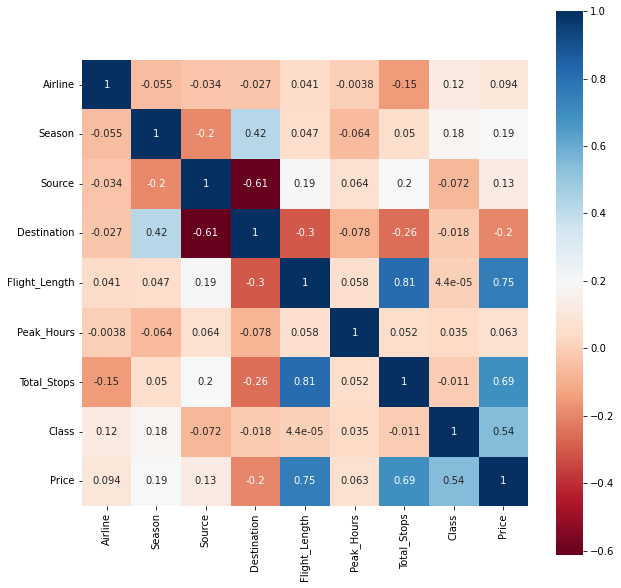

In [75]:
plt.figure(figsize= (10,10))

# correlation between columns in dataE
sns.heatmap(dataE.corr(), annot=True, cmap="RdBu", square=True)

# 5- Data Visualization

<AxesSubplot:ylabel='Airline'>

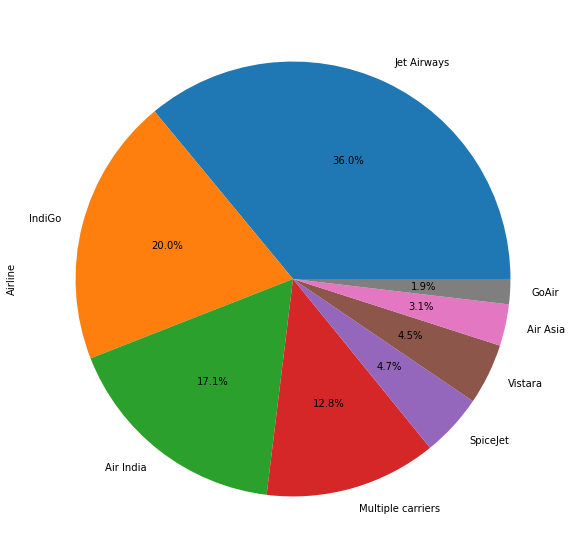

In [76]:
plt.figure(figsize= (10,10))

data['Airline'].value_counts().plot.pie(autopct='%0.1f%%')

<AxesSubplot:xlabel='Airline', ylabel='Price'>

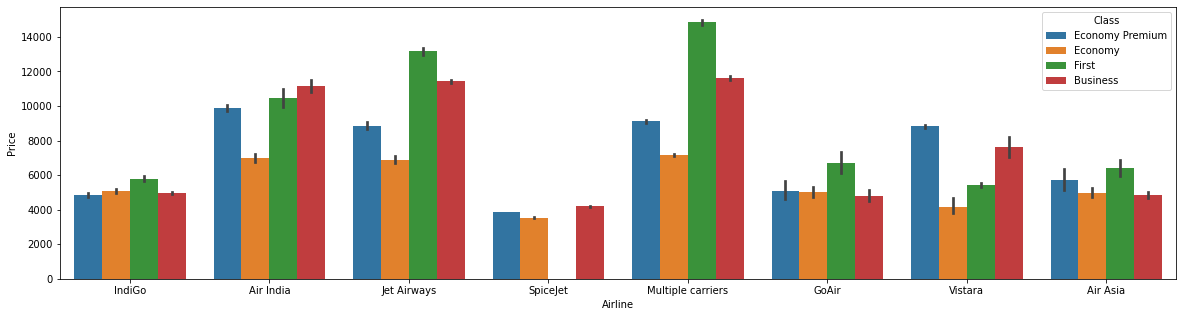

In [77]:
plt.figure(figsize= (20,5))

sns.barplot(x= 'Airline', y= 'Price', hue='Class', data=data)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

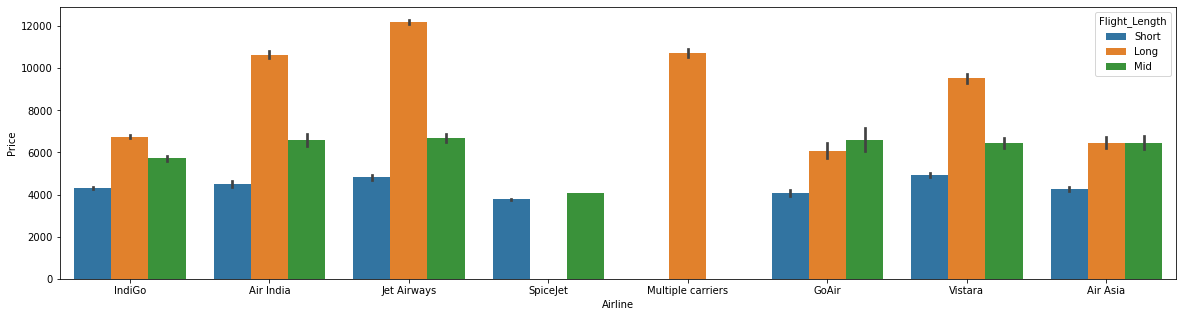

In [78]:
plt.figure(figsize= (20,5))

sns.barplot(x= 'Airline', y= 'Price', hue='Flight_Length', data=data)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

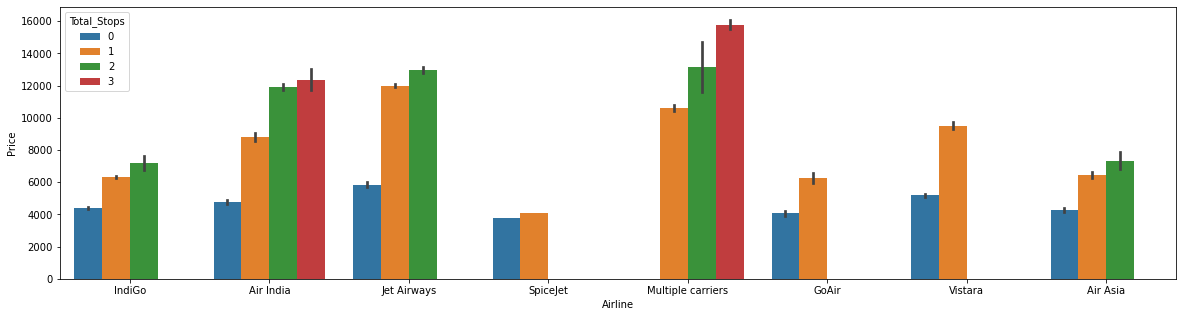

In [79]:
plt.figure(figsize= (20,5))

sns.barplot(x= 'Airline', y= 'Price', hue='Total_Stops', data=data)

<AxesSubplot:xlabel='Airline', ylabel='count'>

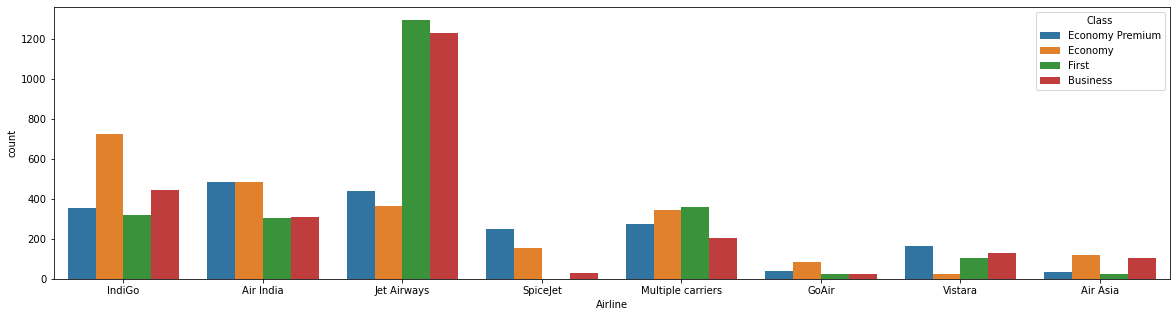

In [80]:
plt.figure(figsize= (20,5))

sns.countplot(x= 'Airline', hue= 'Class', data=data)

<AxesSubplot:xlabel='Flight_Length', ylabel='Price'>

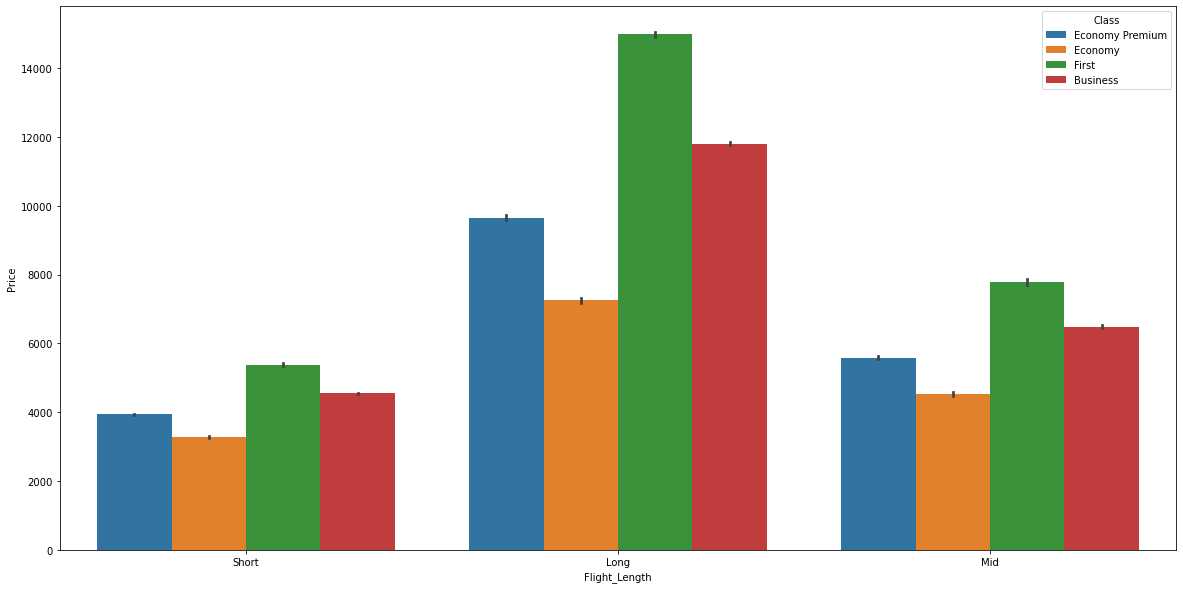

In [81]:
plt.figure(figsize= (20,10))

sns.barplot(x= 'Flight_Length', y= 'Price', hue='Class', data=data)

<AxesSubplot:xlabel='Flight_Length', ylabel='count'>

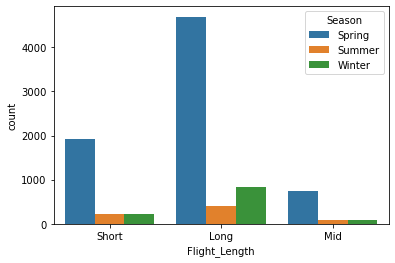

In [82]:
sns.countplot(x='Flight_Length', hue='Season', data=data)

<AxesSubplot:xlabel='Flight_Length', ylabel='Price'>

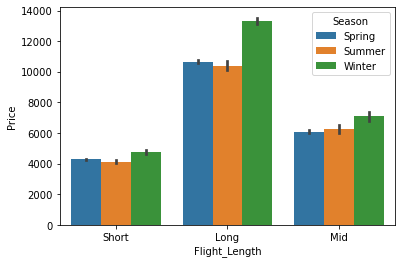

In [83]:
sns.barplot(x='Flight_Length', y='Price', hue='Season', data=data)

<AxesSubplot:ylabel='Source'>

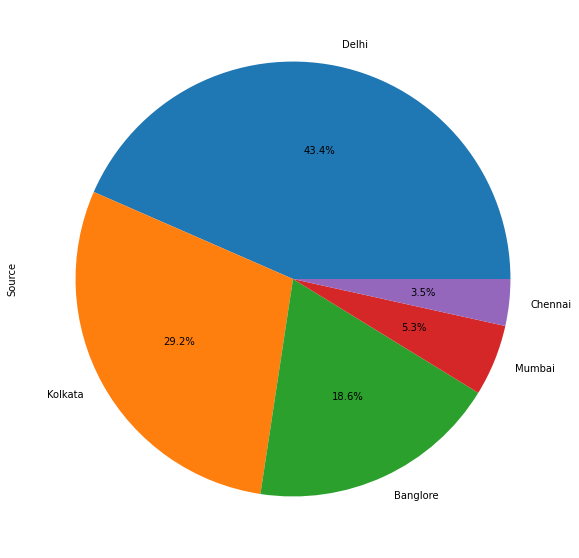

In [84]:
plt.figure(figsize= (10,10))

data['Source'].value_counts().plot.pie(autopct='%0.1f%%')

<AxesSubplot:ylabel='Destination'>

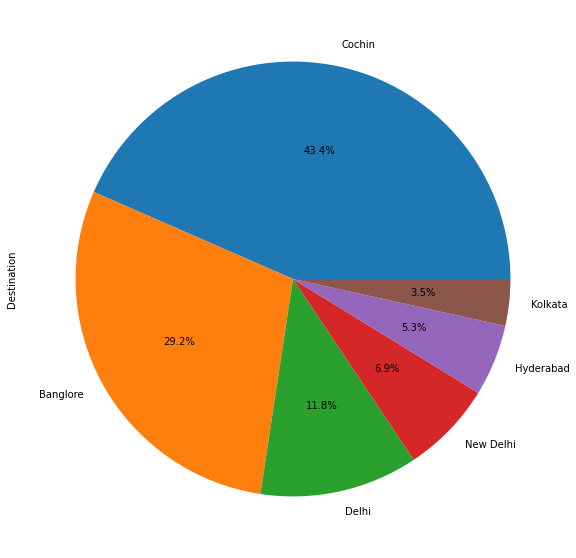

In [85]:
plt.figure(figsize= (10,10))

data['Destination'].value_counts().plot.pie(autopct='%0.1f%%')

# 6- Machine Learning Model

In [86]:
# Importing the dataset determining the factors affecting estemated parameter
X = np.asanyarray(dataE[ ['Flight_Length', 'Total_Stops', 'Class'] ]) #converts every column into an array
Y = np.asanyarray(dataE[ ['Price'] ])

In [87]:
# Splitting the dataset into the Training set, and Test set. 1/3, and fixed random state 47.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 47)

In [88]:
#setting it as regressor
regressor = LinearRegression()        

In [89]:
#start Training
regressor.fit(X_train, y_train)

LinearRegression()

In [90]:
#start testing

y_pred = regressor.predict(X_test) #function enables us to predict the labels of the data values on the basis of the trained model

In [91]:
print('MSE:', metrics.mean_squared_error(y_pred,y_test) ) 

#the average of the square of the difference between the observed and predicted values of a variable

print('MAE:', metrics.mean_absolute_error(y_pred,y_test) )

#It calculates errors between actual values and values predicted by the model

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred,y_test)) ) #Mean squared error regression loss

print('r2_score:', metrics.r2_score(y_pred,y_test) * 100 )

MSE: 1836604.3574427082
MAE: 1065.5127088504296
RMSE: 1355.2137681719103
r2_score: 86.70179780109446


# Domain Research

### The differences between long-haul & short-haul piloting

https://www.themcggroup.com/blog/the-differences-between-longhaul-and-shorthaul-piloting/bp67/

### Top Factors That Determine Flight Ticket Prices

https://www.intermiles.com/blog/top-factors-that-determine-flight-ticket-prices

### Does Shopping Time Affect Flight Prices?

https://media.hopper.com/research/shopping-time-affect-flight-prices